# 操作 fits 文件

## 0.查看基本信息

[HDUList](https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList) 是 fits 文件结构的最顶层部分，其包含 2 个属性：
- header
- data

<br />

In [1]:
from astropy.io import fits

data_dir = '/home/mxx/test_data2/'
filename = 'spec-58938-HD151157N364516M02_sp16-248.fits'
with fits.open(data_dir + filename) as f:
    f.info()

Filename: /home/mxx/test_data2/spec-58938-HD151157N364516M02_sp16-248.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     160   (3894, 6)   float32   
  1                1 BinTableHDU    129   1R x 54C   [8A, 18A, J, J, 19A, 5A, D, D, 4A, 3A, J, 7A, 3A, E, E, E, J, E, 21A, 10J, J, 10E, 100E, E, E, E, E, E, E, J, E, E, E, J, E, E, A, A, A, E, E, E, E, E, E, E, E, J, 6A, 3A, E, E, E, E]   


<br/>

根据 `.info()` 方法返回的信息依次分析：

- No.: HDUList 的序号，在该例中有 2 个 HDUList
- Ver: Version，版本号
- Type: HDU 的类型，一般有 PrimaryHDU, ImageHDU, TableHDU, BinTableHDU, GroupsHDU, ...
- Cards: 简单理解为一个 Card 对应 header 中的一条信息，一般一个 Card 包含下面 3 个属性 (其中 comment 属性不是必需的)： 
  - Keyword - 必须是 str 类型，且一般是唯一的
  - Value - 可以是 str, int, float, bool, complex
  - Comment - 必须是 str 类型
- Dimension: 数据维度
- Format: 数据格式

---

## 1.查看 header

### 1.1.查看 header 的全部信息

使用 `repr` (report) 方法漂亮地输出所有的 header 信息，每一行信息即为上述提到的一个 Card。

*注：此 fits 文件中共有 2 个 HDUList，而第一个 HDUList 包含了主要的光谱信息，是我们所关注的部分，因而接下来均以第一个 HDUList 即 PrimaryHDU 为例*。

<br />

In [2]:
with fits.open(data_dir + filename) as f:
    hdr = f['Flux'].header  
    # hdr = f[0].header  # 也可以用索引值 
    print(repr(hdr))

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 3894 /                                                
NAXIS2  =                    6 /                                                
EXTEND  =                    T /Extensions may be present                       
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-58938-HD151157N364516M02_sp16-248.fits' /                       
GENETIME= '2020-07-01T04:58:38' / Generation time of this fits file (UTC)       
AUTHOR  = ' LAMOST pipeline'   / Who compiled the information                   
N_EXTEN = '2       '           /                                                
EXTEN0  = 'Flux Inverse Subc

### 1.2.查看 value

In [3]:
# 有 2 种方法
# 方法 1：关键字
with fits.open(data_dir + filename) as f:
    hdr = f[0].header
    tmp = hdr['SIMPLE']
    print(tmp)

True


In [4]:
# 方法 2：索引值（不推荐）
with fits.open(data_dir + filename) as f:
    hdr = f[0].header
    tmp = hdr[0]  # 支持切片，显示多个
    print(tmp)

True


### 1.3.查看 comment

In [5]:
with fits.open(data_dir + filename) as f:
    keyword = 'DATE-OBS'
    tmp1 = f[0].header[keyword]
    tmp2 = f[0].header.comments[keyword]
    print(keyword + '\n' + tmp1 + '\n' + tmp2)

DATE-OBS
2020-03-30T02:29:02.637
UTC date and time at the start of observat


### 1.4.查看 keyword

In [6]:
with fits.open(data_dir + filename) as f:
    hdr = f[0].header
    keywords = list(hdr.keys())
    print(keywords)

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', '', 'COMMENT', 'FILENAME', 'GENETIME', 'AUTHOR', 'N_EXTEN', 'EXTEN0', 'EXTEN1', 'ORIGIN', 'COMMENT', 'TELESCOP', 'LONGITUD', 'LATITUDE', 'FOCUS', 'CAMPRO', 'CAMVER', 'COMMENT', 'DATE-OBS', 'DATE-BEG', 'DATE-END', 'OBSERVER', 'PLANID', 'NGUIDE', 'RA', 'DEC', 'MAGTYPE', 'EQUINOX', 'RADECSYS', 'GALLONG', 'GALLATI', 'AZ', 'ALT', 'HA_BEGN', 'HA_END', 'OBS_TYPE', 'OBSCOMM', 'SEEING', 'MOONPHA', 'AIRMASS', 'SPID', 'SPRA', 'SPDEC', 'SLIT_MOD', 'COMMENT', 'WTIME', 'TEMPCCDB', 'TEMPCCDR', 'TEMP_AIR', 'TEMP_FP', 'TEMP_MA', 'TEMP_MB', 'DEWPOINT', 'HUMIDITY', 'WINDD', 'WINDS', 'SKYLEVEL', 'COMMENT', 'VERSIDL', 'VERS2D', 'SVNREV', 'MJD', 'MJDLIST', 'MJMLIST', 'SKYLIST', 'LAMPLIST', 'EXPID1', 'EXPID2', 'EXPID3', 'EXPID4', 'EXPID5', 'EXPID6', 'EXPID7', 'EXPID8', 'NEXP', 'NEXP_B', 'NEXP_R', 'EXPT_B', 'EXPT_R', 'EXPTIME', 'BESTEXP', 'QUALITY', 'SCAMEAN', 'EXTRACT', 'SFLATTEN', 'PCASKYSB', 'NSKIES', 'SKYCHI2', 'SCHI2MIN', 'SCHI2MAX', 'NSTD', 'FS

---

## 2.查看 data

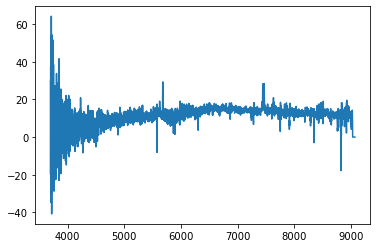

In [17]:
import matplotlib.pyplot as plt
import numpy as np

with fits.open(data_dir + filename) as f:
    # read the header and data of the spectra HDU
    header = f[0].header
    data = f[0].data
    
    # get the flux
    flux = data[0]
    
    # get the wavelength
    log_wave0 = header['COEFF0']  # Central wavelength (log10) of first pixel
    log_dw = header['COEFF1']     # log10 dispersion per pixel
    number = header['NAXIS1']     # the number of pixels
    wavelength = 10 ** (log_wave0 + np.arange(number) * log_dw)

%matplotlib inline
plt.plot(wavelength, flux)

## 参考资料

- [FITS File Handling](https://docs.astropy.org/en/stable/io/fits/index.html)
- [FITS Standard Document](https://fits.gsfc.nasa.gov/fits_standard.html)